# 出題内容
以下に示す2つの式の交点の座標𝑥を1つ求めよ。ここで、xの初期値は0.3とする。

![数式](newton_p02_1.JPG)

ヒント
* まず各グラフを描いて、解があることを確認しておいた方が良い
* [numpyに実装されたsinの逆関数](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arcsin.html)
* [numpyに実装されたtanの逆関数](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arctan.html)
* arctanには引数を2つ取るarctan2もある


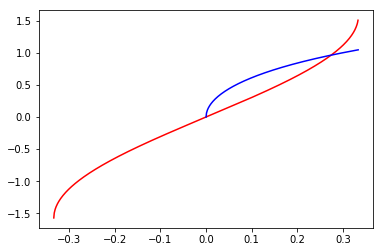

In [4]:
# 連立方程式(1)の解答例
# セルをまたぐので注意
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.arcsin(3*x)   # arc sinの定義域が-1<= この範囲 <=1　であることに注意

def g(x):
    return 2 * np.arctan(x ** 0.5)  # x >= 0でないと、√xは複素解となり、エラーとなる

def plot_graph(func, x1, x2, dx, color):
    """ 関数のグラフを作成するが、描画はしない（重ね書きするかどうかはコントロールしたい）
    """
    x = np.arange(x1, x2, dx)
    y_f = func(x)
    plt.plot(x, y_f, c=color)
    plt.grid()  # なぜか、グリッドは表示されたりされなかったり・・・
    
# まず、関数のグラフを確認
plot_graph(f, -1/3, 1/3, 0.001, "red")  
plot_graph(g, 0, 1/3, 0.001, "blue")
plt.show()

↑グラフを見ると、交点が2か所存在する。ただ、1点は関数の定義域の端であるx = 0で交差しており、この点がニュートン法で求まるかは不明だ。

In [5]:
# 解答例の続き

def equation(x):
    return f(x) - g(x)

def diff(func, x, dx): # funcは微分したい方程式の値を返す関数
    return (func(x + dx) - func(x)) / dx

def calc_newton(func, x_init, dx): # 汎用ニュートン法で解を求める関数
    x = x_init
    y = float("inf")
    count = 0
    e = 1.0

    while abs(y) > 0.01 and count < 1000 and e > 0.00001:
        y = func(x)
        dydx = diff(func, x, dx)
        new_x = -y / dydx + x
        e = abs(new_x - x) / (abs(x) + 0.0000000001)
        x = new_x
        count += 1

    print(x, count) # 使う時にはコメントアウトした方が良い
    return x

# 交点の座標xを求める
calc_newton(equation, 0.3, 0.001) # 関数の定義域と関数の性質から、xの初期値は限られた範囲しか取れない

0.273881213155 3


0.27388121315521724

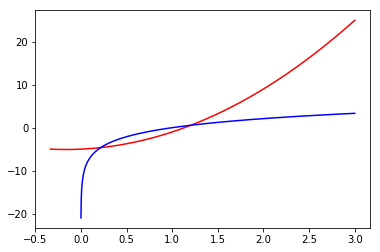

In [6]:
# 連立方程式(2)の解答例
# セルをまたぐので注意
# 上のセルを全て実行済みなら、うまくグラフが描画される
import numpy as np
import matplotlib.pyplot as plt


def f2(x):
    return 3 * x**2 + x - 5

def g2(x):
    return 7 * np.log10(x)  # 対数なので、x > 0でないとエラーとなる
   
# まず、関数のグラフを確認
plot_graph(f2, -1/3, 3, 0.001, "red")  # 上のセルで定義した関数が（実行済みなら）呼び出される
plot_graph(g2, 0.001, 3, 0.001, "blue")
plt.show()

↑グラフを見ると、交点が2か所存在する。

In [7]:
# 解答例の続き
# 上のセルを全て実行済みなら、うまく計算される

def equation2(x):
    return f2(x) - g2(x)

# 交点の座標xを求める
calc_newton(equation2, 0.3, 0.001) # 上のセルで定義した関数が（実行済みなら）呼び出される

0.217260630124 4


0.21726063012437813